In [1]:
import os
import sys
import numpy as np
import xarray as xr
import psyplot.project as psy
import matplotlib.pyplot as plt

sys.path.insert(0, '../sec2_data')
from functions import add_derivatives

# For psyplot
import psyplot.project as psy
import matplotlib as mpl
# %matplotlib inline
# %config InlineBackend.close_figures = False

psy.rcParams['plotter.maps.xgrid'] = False
psy.rcParams['plotter.maps.ygrid'] = False
mpl.rcParams['figure.figsize'] = [10., 8.]

In [2]:
# See ~/workspace_icon-ml/symbolic_regression/finding_symmetries/pysr_results_dyamond_on_regimes/no_of_regimes_2/notes.txt
def func(rh, ta, clw, cli, rh_z):
    
    (a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10,a_11,eps,A,B) = (203, 0.06588, 0.03969, 33.87, 4224.6, 18.9586, 2202.6, 20000000000, 60000000, 8641, 32544, 0.0106, 1, 1)
    
    # Modified to always satisfy RH-constraint
    rh = np.maximum(rh, -a_2/(2*a_1)*ta**2 + a_4/(2*a_1)*ta - a_5/(2*a_1))
    
    I1 = a_1*rh**2+ta**2*(a_2*rh-a_3)-a_4*rh*ta+a_5*rh+a_6*ta-a_7
    I2 = (rh_z)**2*(a_8*rh_z+a_9) 
    I3 = -B/(a_10*clw+a_11*cli+eps)
    
    return I1, I2, I3

In [3]:
# All days for which I1, I2, I3 shall be computed
days_summer = ['20160811', '20160812', '20160813', '20160814', '20160815', '20160816', '20160817', '20160818', '20160819', '20160820']
days_winter = ['20200201030000-20200201210000', '20200202030000-20200202210000', '20200203030000-20200203210000', \
               '20200204030000-20200204210000', '20200205030000-20200205210000', '20200206030000-20200206210000', \
               '20200207030000-20200207210000', '20200208030000-20200208210000', '20200209030000-20200209210000', \
               '20200210030000-20200210210000']

In [4]:
# Add derivatives
def compute_derivatives(data_dict):
    base_variables = ['rh', 'zg']
    # All 8 time steps, only first-order derivative of RH
    add_derivatives(data_dict, base_variables, t_steps=8, order=1)
    
    return data_dict['rh_z']

In [5]:
# # For DYAMOND SUMMER days
# dya_nc_path = '~/bd1179_work/DYAMOND/hvcg_data/'
# var_names = ['clw', 'cli', 'ta', 'pa', 'hus']

# for day_summer in days_summer:
#     print(day_summer)
#     data = {}
#     for var_name in var_names:
#         file_path = os.path.join(dya_nc_path, var_name, \
#                     'int_var_nwp_R2B10_lkm1007_atm_3d_' + var_name + '_ml_' + day_summer + 'T000000Z_R02B05.nc')

#         # Load files with xarray
#         file_ds = xr.open_dataset(file_path)

#         data[var_name] = getattr(file_ds, var_name).values[:, 4:]

#     # Compute RH
#     T0 = 273.15
#     data['rh'] = 0.00263*data['pa']*data['hus']*np.exp((17.67*(data['ta']-T0))/(data['ta']-29.65))**(-1)
    
#     # Compute RH_z
#     DS = xr.open_mfdataset('~/bd1179_work/DYAMOND/hvcg_data/zg/zg*')
#     data_dict = {}
#     data_dict['zg'] = DS.zg.values
#     data_dict['zg'] = np.repeat(np.expand_dims(data_dict['zg'], axis=0)[:, 4:], 8, axis=0)
#     data_dict['rh'] = data['rh']
    
#     data['rh_z'] = compute_derivatives(data_dict)
    
#     # Compute I1, I2, I3 for this day
#     I1, I2, I3 = func(data['rh'],data['ta'],data['clw'],data['cli'],data['rh_z'])
    
#     # Save I1, I2, I3 in DataArrays
#     I1_new_da = xr.DataArray(I1, coords={'time':file_ds.time, 'height':file_ds.height[4:31]}, dims=['time', 'height', 'cells'], name='I1')
#     I2_new_da = xr.DataArray(I2, coords={'time':file_ds.time, 'height':file_ds.height[4:31]}, dims=['time', 'height', 'cells'], name='I2') 
#     I3_new_da = xr.DataArray(I3, coords={'time':file_ds.time, 'height':file_ds.height[4:31]}, dims=['time', 'height', 'cells'], name='I3') 

#     # Save I1, I2, I3 in new netcdf files
#     I1_new_da.to_netcdf('~/bd1179_work/DYAMOND/hvcg_data/I1/' + 'I1_' + day_summer + '.nc')
#     I2_new_da.to_netcdf('~/bd1179_work/DYAMOND/hvcg_data/I2/' + 'I2_' + day_summer + '.nc')
#     I3_new_da.to_netcdf('~/bd1179_work/DYAMOND/hvcg_data/I3/' + 'I3_' + day_summer + '.nc')

In [ ]:
# For DYAMOND Winter days
dya_nc_path = '~/bd1179_work/DYAMOND/hvcg_data/'
var_names = ['clw', 'cli', 'ta', 'pa', 'hus']

for day_winter in days_winter:
    print(day_winter)
    data = {}
    for var_name in var_names:
        file_path = os.path.join(dya_nc_path, var_name, \
                    'int_var_' + var_name + '_3hr_ICON-NWP-2km_DW-ATM_r1i1p1f1_ml_gn_' + day_winter + '_R02B05.nc')
        
        # Load files with xarray
        file_ds = xr.open_dataset(file_path)

        data[var_name] = getattr(file_ds, var_name).values[:, 4:]

    # Compute RH
    T0 = 273.15
    data['rh'] = 0.00263*data['pa']*data['hus']*np.exp((17.67*(data['ta']-T0))/(data['ta']-29.65))**(-1)
    
    # Compute RH_z
    DS = xr.open_mfdataset('~/bd1179_work/DYAMOND/hvcg_data/zg/zg*')
    data_dict = {}
    data_dict['zg'] = DS.zg.values
    data_dict['zg'] = np.repeat(np.expand_dims(data_dict['zg'], axis=0)[:, 4:], 7, axis=0)
    data_dict['rh'] = data['rh']
    
    data['rh_z'] = compute_derivatives(data_dict)
    
    # Compute I1, I2, I3 for this day
    I1, I2, I3 = func(data['rh'],data['ta'],data['clw'],data['cli'],data['rh_z'])
    
    # Save I1, I2, I3 in DataArrays
    I1_new_da = xr.DataArray(I1, coords={'time':file_ds.time, 'height':file_ds.height[4:31]}, dims=['time', 'height', 'cells'], name='I1')
    I2_new_da = xr.DataArray(I2, coords={'time':file_ds.time, 'height':file_ds.height[4:31]}, dims=['time', 'height', 'cells'], name='I2') 
    I3_new_da = xr.DataArray(I3, coords={'time':file_ds.time, 'height':file_ds.height[4:31]}, dims=['time', 'height', 'cells'], name='I3') 

    # Save I1, I2, I3 in new netcdf files
    I1_new_da.to_netcdf('~/bd1179_work/DYAMOND/hvcg_data/I1/' + 'I1_' + day_winter + '.nc')
    I2_new_da.to_netcdf('~/bd1179_work/DYAMOND/hvcg_data/I2/' + 'I2_' + day_winter + '.nc')
    I3_new_da.to_netcdf('~/bd1179_work/DYAMOND/hvcg_data/I3/' + 'I3_' + day_winter + '.nc')

Setgrid for all files in the I1, I2, I3 folders

In [ ]:
# %%bash

# target_grid="/pool/data/ICON/grids/public/mpim/0019/icon_grid_0019_R02B05_G.nc"

# # I1
# cd ~/bd1179_work/DYAMOND/hvcg_data/I1/
# files=`ls .`
# for file in $files; do
#    cdo setgrid,$target_grid $file wgrid_$file
# done

# # I2
# cd ~/bd1179_work/DYAMOND/hvcg_data/I2/
# files=`ls .`
# for file in $files; do
#    cdo setgrid,$target_grid $file wgrid_$file
# done

# # I3
# cd ~/bd1179_work/DYAMOND/hvcg_data/I3/
# files=`ls .`
# for file in $files; do
#    cdo setgrid,$target_grid $file wgrid_$file
# done

**Plotting with psyplot**

Vertical level 41 (which has index 20 here!) has min/avrg/max height of 1277.0/1489.7/6156.2m

Use plot.keys(), plot.docs() to investigate options!

In [70]:
cmap = 'bwr'

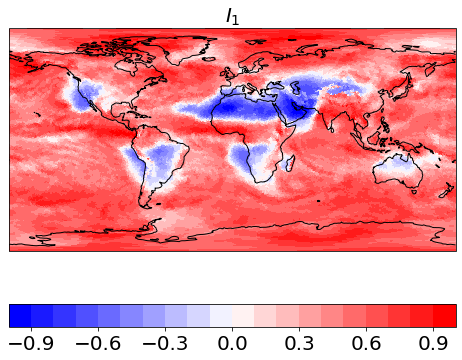

In [8]:
plot = psy.plot.mapplot('~/bd1179_work/DYAMOND/hvcg_data/I1/20160811-0820_timmean_scaled.nc', name=['I1'], \
                        height=[20], time=[0], ax=(1, 1), sort=['height'], title = r'$I_1$', titlesize=20, cticksize=20, \
                        bounds=np.linspace(-1, 1, 21), cmap=cmap)

plt.savefig('I1_lv_41_20160811-0820_timmean.pdf')

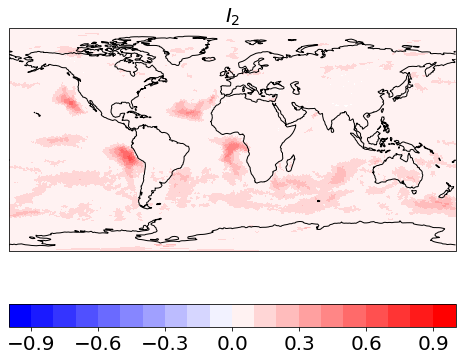

In [9]:
maps = psy.plot.mapplot('~/bd1179_work/DYAMOND/hvcg_data/I2/20160811-0820_timmean_scaled.nc', name=['I2'], \
                        height=[20], time=[0], ax=(1, 1), sort=['height'], title = r'$I_2$', titlesize=20, cticksize=20, \
                        bounds=np.linspace(-1, 1, 21), cmap=cmap)

plt.savefig('I2_lv_41_20160811-0820_timmean.pdf')

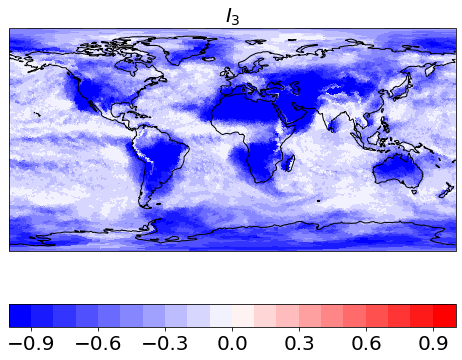

In [10]:
maps = psy.plot.mapplot('~/bd1179_work/DYAMOND/hvcg_data/I3/20160811-0820_timmean_scaled.nc', name=['I3'], \
                        height=[20], time=[0], ax=(1, 1), sort=['height'], title = r'$I_3$', titlesize=20, cticksize=20, \
                        bounds=np.linspace(-1, 1, 21), cmap=cmap)

plt.savefig('I3_lv_41_20160811-0820_timmean.pdf')

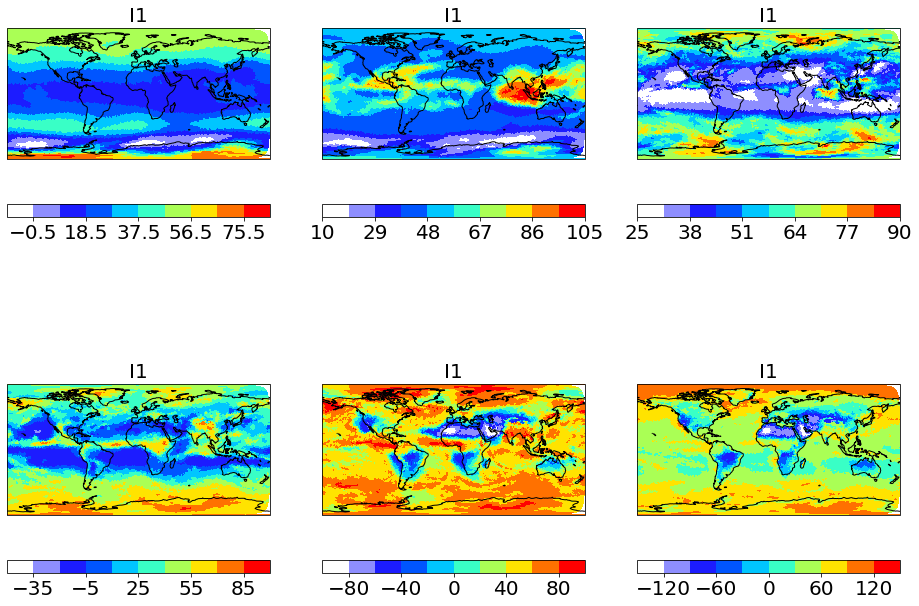

In [91]:
maps = psy.plot.mapplot('~/bd1179_work/DYAMOND/hvcg_data/I1/20160811-0820_timmean.nc', name=['I1'], \
                        height=[1, 5, 10, 15, 20, 25], time=[0], ax=(2, 3), sort=['height'], title = 'I1', titlesize=20, cticksize=20)

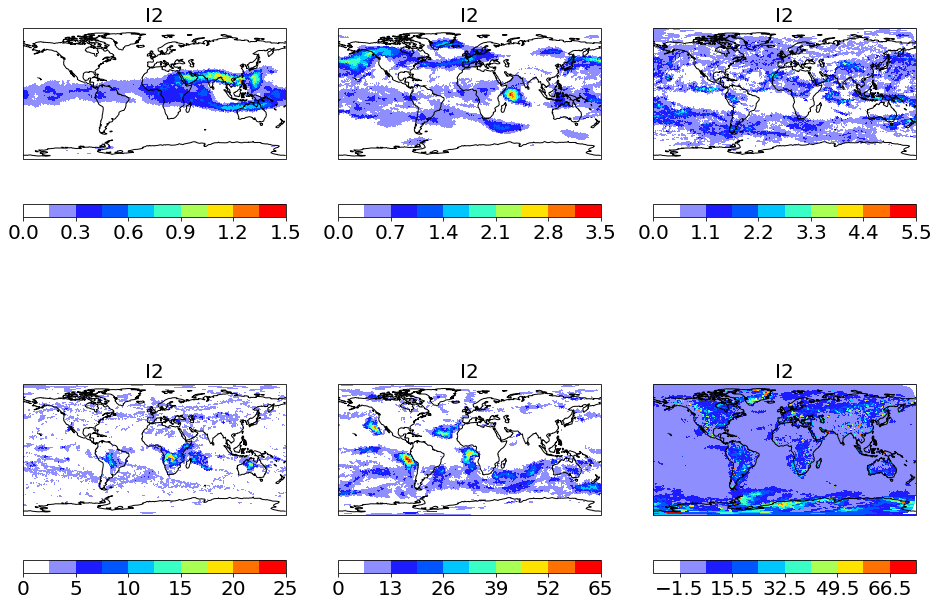

In [90]:
maps = psy.plot.mapplot('~/bd1179_work/DYAMOND/hvcg_data/I2/20160811-0820_timmean.nc', name=['I2'], \
                        height=[1, 5, 10, 15, 20, 25], time=[0], ax=(2, 3), sort=['height'], title = 'I2', titlesize=20, cticksize=20)

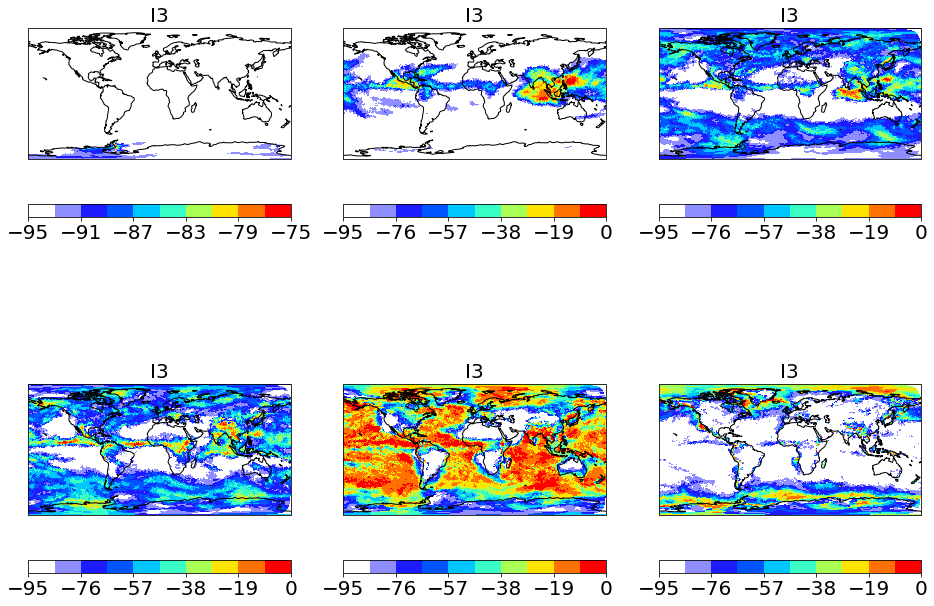

In [92]:
maps = psy.plot.mapplot('~/bd1179_work/DYAMOND/hvcg_data/I3/20160811-0820_timmean.nc', name=['I3'], \
                        height=[1, 5, 10, 15, 20, 25], time=[0], ax=(2, 3), sort=['height'], title = 'I3', titlesize=20, cticksize=20)

**Explore the a5-term**

In [53]:
# See ~/workspace_icon-ml/symbolic_regression/finding_symmetries/pysr_results_dyamond_on_regimes/no_of_regimes_2/notes.txt
def func_a5(rh, ta):

    T0 = 257.06
    RH0 = 0.6025
    
    a5_term = 1.3176*10**(-3)/2*(ta-T0)**2*(rh-RH0)
    
    return a5_term

In [ ]:
# For DYAMOND SUMMER days
dya_nc_path = '~/bd1179_work/DYAMOND/hvcg_data/'
var_names = ['clw', 'cli', 'ta', 'pa', 'hus']

for day_summer in days_summer:
    print(day_summer)
    data = {}
    for var_name in var_names:
        file_path = os.path.join(dya_nc_path, var_name, \
                    'int_var_nwp_R2B10_lkm1007_atm_3d_' + var_name + '_ml_' + day_summer + 'T000000Z_R02B05.nc')

        # Load files with xarray
        file_ds = xr.open_dataset(file_path)

        data[var_name] = getattr(file_ds, var_name).values[:, 4:]

    # Compute RH
    T0 = 273.15
    data['rh'] = 0.00263*data['pa']*data['hus']*np.exp((17.67*(data['ta']-T0))/(data['ta']-29.65))**(-1)
    
    # Compute RH_z
    DS = xr.open_mfdataset(os.environ['HOME'] + '/bd1179_work/DYAMOND/hvcg_data/zg/zg*')
    data_dict = {}
    data_dict['zg'] = DS.zg.values
    data_dict['zg'] = np.repeat(np.expand_dims(data_dict['zg'], axis=0)[:, 4:], 8, axis=0)
    data_dict['rh'] = data['rh']
    
    # data['rh_z'] = compute_derivatives(data_dict)
    
    # Compute a5 for this day
    # a5_term = func_a5(data['rh'],data['ta'])
    
    # Save a5 in DataArrays
    # a5_term_new_da = xr.DataArray(a5_term, coords={'time':file_ds.time, 'height':file_ds.height[4:31]}, dims=['time', 'height', 'cells'], \
                                  # name='a5_term')
    # rh_new_da = xr.DataArray(data['rh'], coords={'time':file_ds.time, 'height':file_ds.height[4:31]}, dims=['time', 'height', 'cells'], \
    #                               name='rh')
    ta_new_da = xr.DataArray(data['ta'], coords={'time':file_ds.time, 'height':file_ds.height[4:31]}, dims=['time', 'height', 'cells'], \
                                  name='ta')

    # Save a5 in new netcdf files
    # a5_term_new_da.to_netcdf('~/bd1179_work/DYAMOND/hvcg_data/a5_term/' + 'a5_term_' + day_summer + '.nc')
    # rh_new_da.to_netcdf('~/bd1179_work/DYAMOND/hvcg_data/a5_term/' + 'rh_' + day_summer + '.nc')
    ta_new_da.to_netcdf('~/bd1179_work/DYAMOND/hvcg_data/a5_term/' + 'ta_' + day_summer + '.nc')

**Plotting with psyplot**

Use plot.keys(), plot.docs() to investigate options!

In [2]:
os.listdir('/home/b/b309170/bd1179_work/DYAMOND/hvcg_data/a5_term')

['a5_term_20160819.nc',
 'a5_term_20160813.nc',
 'a5_term_20160814.nc',
 'a5_term_20160815.nc',
 'a5_term_20160818.nc',
 'a5_term_20160811.nc',
 'a5_term_20160812.nc',
 'a5_term_20160820.nc',
 'merged.nc',
 'a5_term_20160817.nc',
 'a5_term_20160816.nc',
 '20160811-0820_timmean.nc',
 '20160811-0820_timmean_wgrid.nc']

In [3]:
cmap = 'bwr'

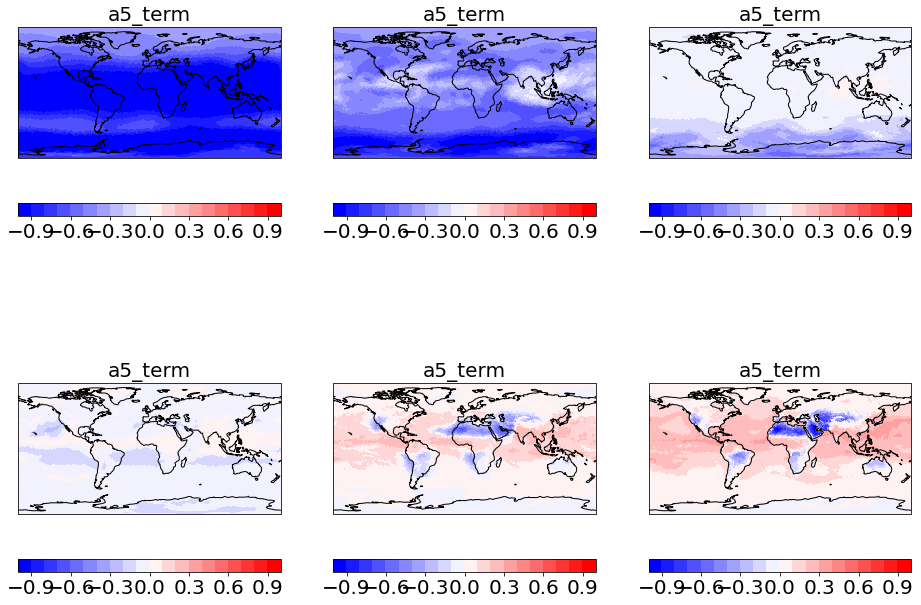

In [4]:
maps = psy.plot.mapplot(os.environ['HOME'] + '/bd1179_work/DYAMOND/hvcg_data/a5_term/20160811-0820_timmean_wgrid.nc', name=['a5_term'], \
                        height=[1, 5, 10, 15, 20, 25], time=[0], ax=(2, 3), sort=['height'], title = 'a5_term', titlesize=20, cticksize=20,
                        bounds=np.linspace(-1, 1, 21), cmap=cmap)

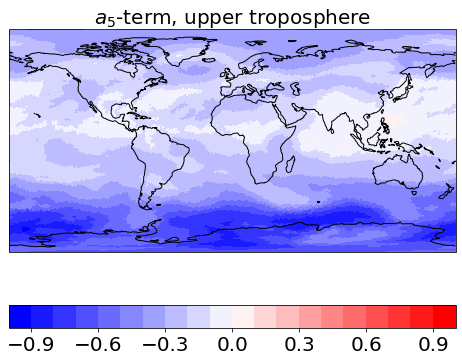

In [6]:
plot = psy.plot.mapplot('~/bd1179_work/DYAMOND/hvcg_data/a5_term/20160811-0820_timmean_wgrid.nc', name=['a5_term'], \
                        height=[7], time=[0], ax=(1, 1), sort=['height'], title = r'$a_5$-term, upper troposphere', titlesize=20, cticksize=20, \
                        bounds=np.linspace(-1, 1, 21), cmap=cmap)

plt.savefig('a5_lv_28_20160811-0820_timmean.pdf')

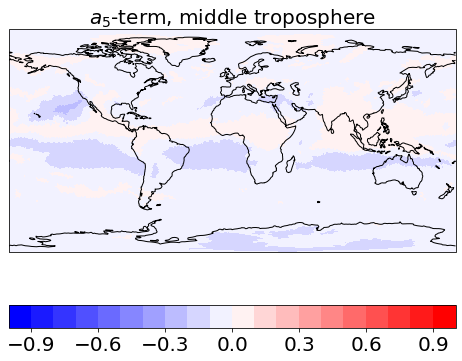

In [7]:
plot = psy.plot.mapplot('~/bd1179_work/DYAMOND/hvcg_data/a5_term/20160811-0820_timmean_wgrid.nc', name=['a5_term'], \
                        height=[15], time=[0], ax=(1, 1), sort=['height'], title = r'$a_5$-term, middle troposphere', titlesize=20, cticksize=20, \
                        bounds=np.linspace(-1, 1, 21), cmap=cmap)

plt.savefig('a5_lv_36_20160811-0820_timmean.pdf')

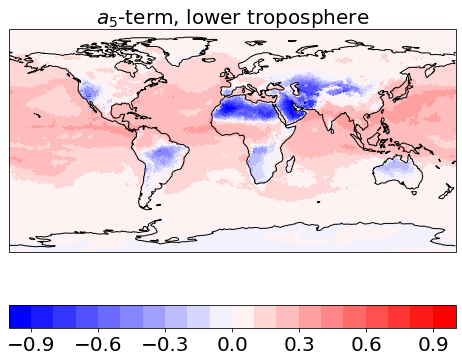

In [8]:
plot = psy.plot.mapplot('~/bd1179_work/DYAMOND/hvcg_data/a5_term/20160811-0820_timmean_wgrid.nc', name=['a5_term'], \
                        height=[25], time=[0], ax=(1, 1), sort=['height'], title = r'$a_5$-term, lower troposphere', titlesize=20, cticksize=20, \
                        bounds=np.linspace(-1, 1, 21), cmap=cmap)

plt.savefig('a5_lv_46_20160811-0820_timmean.pdf')

**Explore the dzRH-term**

When is it strongly negative?

In [ ]:
# For DYAMOND SUMMER days
dya_nc_path = '~/bd1179_work/DYAMOND/hvcg_data/'
var_names = ['clw', 'cli', 'ta', 'pa', 'hus']

for day_summer in days_summer:
    print(day_summer)
    data = {}
    for var_name in var_names:
        file_path = os.path.join(dya_nc_path, var_name, \
                    'int_var_nwp_R2B10_lkm1007_atm_3d_' + var_name + '_ml_' + day_summer + 'T000000Z_R02B05.nc')

        # Load files with xarray
        file_ds = xr.open_dataset(file_path)

        data[var_name] = getattr(file_ds, var_name).values[:, 4:]

    # Compute RH
    T0 = 273.15
    data['rh'] = 0.00263*data['pa']*data['hus']*np.exp((17.67*(data['ta']-T0))/(data['ta']-29.65))**(-1)
    
    # Compute RH_z
    DS = xr.open_mfdataset(os.environ['HOME'] + '/bd1179_work/DYAMOND/hvcg_data/zg/zg*')
    data_dict = {}
    data_dict['zg'] = DS.zg.values
    data_dict['zg'] = np.repeat(np.expand_dims(data_dict['zg'], axis=0)[:, 4:], 8, axis=0)
    data_dict['rh'] = data['rh']
    
    # data['rh_z'] = compute_derivatives(data_dict)
    
    # Compute a5 for this day
    # a5_term = func_a5(data['rh'],data['ta'])
    
    # Save a5 in DataArrays
    # a5_term_new_da = xr.DataArray(a5_term, coords={'time':file_ds.time, 'height':file_ds.height[4:31]}, dims=['time', 'height', 'cells'], \
                                  # name='a5_term')
    # rh_new_da = xr.DataArray(data['rh'], coords={'time':file_ds.time, 'height':file_ds.height[4:31]}, dims=['time', 'height', 'cells'], \
    #                               name='rh')
    # rh_z_new_da = xr.DataArray(data['rh_z'], coords={'time':file_ds.time, 'height':file_ds.height[4:31]}, dims=['time', 'height', 'cells'], \
    #                               name='dzrh')
    rh_new_da = xr.DataArray(data['rh'], coords={'time':file_ds.time, 'height':file_ds.height[4:31]}, dims=['time', 'height', 'cells'], \
                                  name='rh')

    # Save a5 in new netcdf files
    # a5_term_new_da.to_netcdf('~/bd1179_work/DYAMOND/hvcg_data/a5_term/' + 'a5_term_' + day_summer + '.nc')
    # rh_new_da.to_netcdf('~/bd1179_work/DYAMOND/hvcg_data/a5_term/' + 'rh_' + day_summer + '.nc')
    # rh_z_new_da.to_netcdf('~/bd1179_work/DYAMOND/hvcg_data/dzrh_term/' + 'dzrh_' + day_summer + '.nc')
    rh_new_da.to_netcdf('~/bd1179_work/DYAMOND/hvcg_data/rh_term/' + 'rh_' + day_summer + '.nc')

In [ ]:
maps = psy.plot.mapplot(os.environ['HOME'] + '/bd1179_work/DYAMOND/hvcg_data/dzrh_term/20160811-0815_timmean_wgrid.nc', name=['dzrh'], \
                        height=[26], time=[0], ax=(2, 1), sort=['height'], title = 'dzrh', titlesize=20, cticksize=10, cmap=cmap)
plt.savefig('dzrh_surface.pdf')

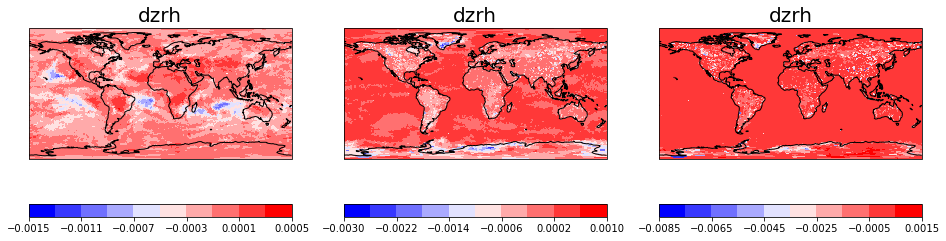

In [27]:
maps = psy.plot.mapplot(os.environ['HOME'] + '/bd1179_work/DYAMOND/hvcg_data/dzrh_term/20160811-0815_timmean_wgrid.nc', name=['dzrh'], \
                        height=[18, 25,26], time=[0], ax=(2, 3), sort=['height'], title = 'dzrh', titlesize=20, cticksize=10, cmap=cmap)
# plt.savefig('dzrh_surface.pdf')